In [4]:
import sys
import scimap as sm
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

In [5]:
# set working directory
os.chdir('/Users/melnike/Desktop/COMET_pipeline')

In [6]:
# import the count matrix from mcmicro pipeline and create the AnnData object
filepath = ['count_matrix.csv']
adata = sm.pp.mcmicro_to_scimap (filepath, drop_markers = ['DAPI'])

Loading count_matrix.csv


In [7]:
# Print adata to check for it's content
adata

AnnData object with n_obs × n_vars = 23251 × 20
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'

In [8]:
adata.obs # prints the meta data

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid
count_matrix_1,3119.863158,362.757895,95,13.257786,9.960130,0.659999,0.887850,0.659722,0.976782,1,count_matrix
count_matrix_2,3131.009901,368.693069,101,21.090538,6.425287,0.952464,0.841667,0.601190,-1.440688,2,count_matrix
count_matrix_3,3203.307692,368.961538,26,6.887945,4.797681,0.717525,0.962963,0.742857,0.058271,3,count_matrix
count_matrix_4,3268.576923,372.561538,130,16.199810,12.361048,0.646355,0.792683,0.580357,0.050472,4,count_matrix
count_matrix_5,3332.481481,372.419753,81,11.564881,9.225398,0.603044,0.920455,0.675000,-1.140375,5,count_matrix
...,...,...,...,...,...,...,...,...,...,...,...
count_matrix_23247,3257.727891,5690.911565,147,22.364686,8.886709,0.917665,0.840000,0.607438,-1.399626,23247,count_matrix
count_matrix_23248,3359.752475,5704.831683,101,13.689847,9.732361,0.703275,0.926606,0.655844,1.222318,23248,count_matrix
count_matrix_23249,3351.692308,5701.384615,13,6.734410,2.934657,0.900058,0.764706,0.464286,1.519167,23249,count_matrix
count_matrix_23250,3221.266667,5712.933333,15,5.258555,3.569134,0.734389,1.000000,0.750000,-0.480816,23250,count_matrix


In [9]:
adata.X # prints the counts table

array([[5.7285604, 6.97305  , 5.9775524, ..., 7.0106635, 7.9959025,
        6.505894 ],
       [5.8617167, 7.357714 , 6.375379 , ..., 7.4255586, 8.464066 ,
        7.16813  ],
       [6.2019124, 7.232038 , 6.3043084, ..., 8.079201 , 7.3042054,
        6.611834 ],
       ...,
       [6.232901 , 7.7356687, 6.541474 , ..., 8.274925 , 8.094895 ,
        7.198989 ],
       [5.746416 , 7.0662966, 5.9820876, ..., 8.987739 , 6.885987 ,
        6.11324  ],
       [6.3674517, 6.6415553, 6.2287927, ..., 8.027337 , 7.260924 ,
        3.465736 ]], dtype=float32)

In [10]:
adata.var # prints the channel or marker names

""
FoxP3
CD68
aSMA
CD31
CD38
IDO-1
s100
CD11c
PD-L1
Ki-67


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



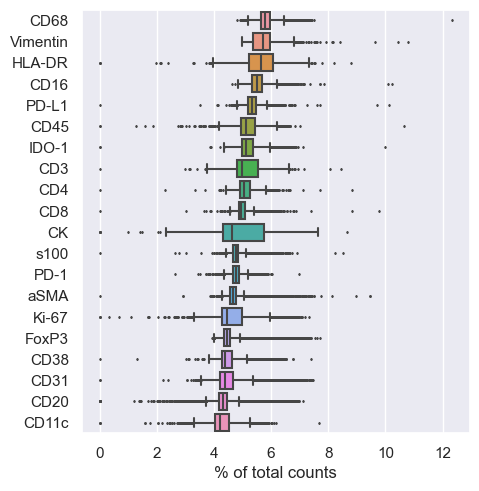

In [11]:
# We can use scanpy package to explore the data
# genes that yield the highest fraction of counts in each single cell, across all cells
# Most expressing proteins
# what kind of markes I would trust and not trust
# 13, PD-1 not PD-L1
sc.pl.highest_expr_genes(adata, n_top=20, )

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'imageid' as categorical


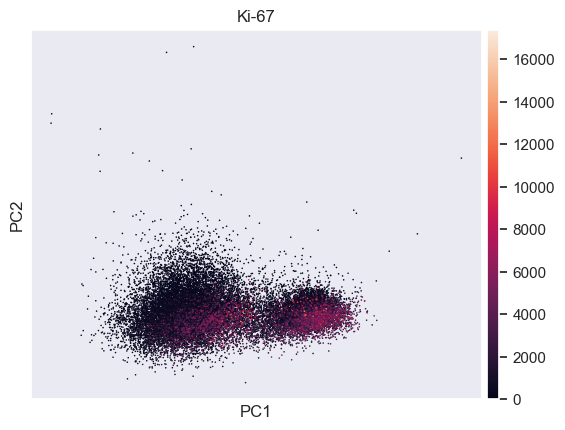

In [12]:
sc.tl.pca(adata, svd_solver='arpack') # peform PCA
sc.pl.pca(adata, color='Ki-67') # scatter plot in the PCA coordinates

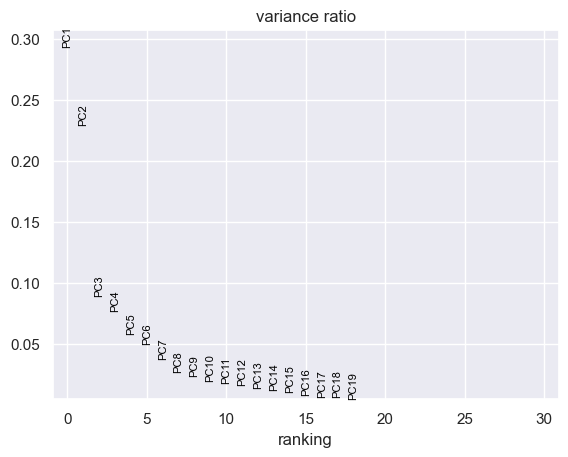

In [13]:
sc.pl.pca_variance_ratio(adata) # PCs to the total variance in the data
# what PCs is the moet contributing to PC analysis
# we should look at no more than 6 PCs

In [14]:
# Save the results
adata.write('tutorial_data.h5ad')